<a href="https://colab.research.google.com/github/Vaishali-Govind/AdminLTE/blob/master/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip zomato.zip

Archive:  zomato.zip
  inflating: zomato/new_processed_reviews.csv  
  inflating: zomato/new_restaurant.csv  
  inflating: zomato/processed_restaurants.csv  
  inflating: zomato/processed_reviews.csv  
  inflating: zomato/restaurants.json  
  inflating: zomato/reviews.json     


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing NLTK library for using stop words method
import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
sdf = pd.read_csv('zomato/new_processed_reviews.csv')
sdf.head()

,user_id,entity_id,review_id,datetime,rating,cool,useful,funny,content
0,2042820,44568,44166735,2019-07-25 12:19:02,1.0,2,5,4,i have been a very loyal customer to global fu...
1,57816837,44568,44134010,2019-07-23 00:36:53,5.0,1,4,5,visited first time on my visit to mumbai and f...
2,42096287,44568,44132846,2019-07-22 23:10:33,5.0,3,3,4,this place is an absolute delight of you're a ...
3,33538931,44568,44082978,2019-07-20 04:42:05,5.0,5,2,3,this is one of the coolest places for a buffet...
4,34390186,44568,44021065,2019-07-15 22:29:08,4.0,0,1,2,"good food, has vast variety to choose from, su..."


In [5]:
print(sdf.shape)

(3228, 9)


In [6]:
print(sdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3228 entries, 0 to 3227
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    3228 non-null   int64  
 1   entity_id  3228 non-null   int64  
 2   review_id  3228 non-null   int64  
 3   datetime   3228 non-null   object 
 4   rating     3228 non-null   float64
 5   cool       3228 non-null   int64  
 6   useful     3228 non-null   int64  
 7   funny      3228 non-null   int64  
 8   content    3228 non-null   object 
dtypes: float64(1), int64(6), object(2)
memory usage: 227.1+ KB
None


In [7]:
print(sdf.describe)

<bound method NDFrame.describe of        user_id  ...                                            content
0      2042820  ...  i have been a very loyal customer to global fu...
1     57816837  ...  visited first time on my visit to mumbai and f...
2     42096287  ...  this place is an absolute delight of you're a ...
3     33538931  ...  this is one of the coolest places for a buffet...
4     34390186  ...  good food, has vast variety to choose from, su...
...        ...  ...                                                ...
3223  86004469  ...  the place was way better than how i expected i...
3224  87603493  ...  the perfect location, awesome ambience, with d...
3225   1602868  ...  amazing food and service but you always need t...
3226  86086246  ...  quality service and quality food great taste a...
3227  52180097  ...  was a wonderful night.enjoyed a lot, just love...

[3228 rows x 9 columns]>


In [8]:
#creating a new column for length of the text
sdf['text_len'] = sdf['content'].apply(len)
sdf.head()

,user_id,entity_id,review_id,datetime,rating,cool,useful,funny,content,text_len
0,2042820,44568,44166735,2019-07-25 12:19:02,1.0,2,5,4,i have been a very loyal customer to global fu...,1152
1,57816837,44568,44134010,2019-07-23 00:36:53,5.0,1,4,5,visited first time on my visit to mumbai and f...,828
2,42096287,44568,44132846,2019-07-22 23:10:33,5.0,3,3,4,this place is an absolute delight of you're a ...,502
3,33538931,44568,44082978,2019-07-20 04:42:05,5.0,5,2,3,this is one of the coolest places for a buffet...,224
4,34390186,44568,44021065,2019-07-15 22:29:08,4.0,0,1,2,"good food, has vast variety to choose from, su...",194


# Visualising the data

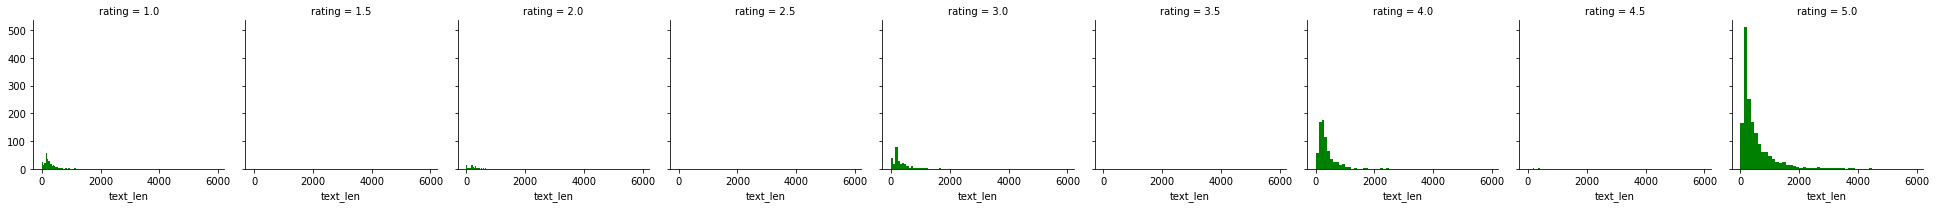

In [9]:
graph1 = sns.FacetGrid(data=sdf, col='rating')
graph1.map(plt.hist, 'text_len', color = 'green', bins = 50)

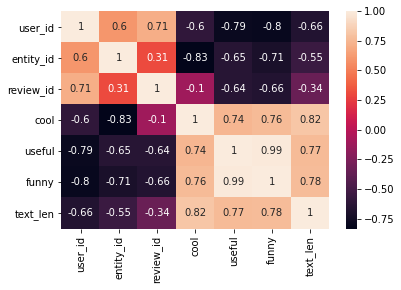

In [10]:
#Grouping the data using start rating and finding if any correlation 
rating = sdf.groupby('rating').mean()
rating.corr()
sns.heatmap(data = rating.corr(), annot = True)

#### This shows that funny is strongly correlated to useful and useful is strongly correlated to text_len
#### Thus, we can say that longer reviews are more funny and useful

In [11]:
#Preparing for classification
sdf_class = sdf[(sdf['rating'] == 1) | (sdf['rating']==5)]
sdf_class.shape

#putting them in seperate variable
x = sdf_class['content']
y = sdf_class['rating']
print(x.head())
print(y.head())

0    i have been a very loyal customer to global fu...
1    visited first time on my visit to mumbai and f...
2    this place is an absolute delight of you're a ...
3    this is one of the coolest places for a buffet...
5    a buffet with endless choices, global fusion g...
Name: content, dtype: object
0    1.0
1    5.0
2    5.0
3    5.0
5    5.0
Name: rating, dtype: float64


In [0]:
#Data cleaning by removing stop words and puntuation
import string
def text_process(content):
  nopunc = [char for char in content if char not in string.punctuation]
  nopunc = ''.join(nopunc)
  return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

# Performing Vectorization

In [15]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
#Import countVectorizer and define it with a variable. Along with that we will fit it to our review text stored in x
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = text_process).fit(x)
print(len(vectorizer.vocabulary_))

9182


In [17]:
review_0 = x[0]
print(review_0)
vocab_0 = vectorizer.transform([review_0])
print(vocab_0)

print("Following Words back")
print(vectorizer.get_feature_names()[1144])
print(vectorizer.get_feature_names()[2027])

i have been a very loyal customer to global fusion for past years, but past times global fusion is been very disapointing firstly when we went, there were no fruits and salads wich r alwys der lik mango and papaya secondly the fork that was given to wat ws so big in size that it felt like serving fork not eating one nobody came to ask if drinks were needed tepenyaki prawns was an absolute disappointment they wer jus plain fried with no taste momos wer extemely dry there was no iceberg in iceberg chkn crispy corn and pepper mushroom were too salty i have been so particular with the name of the dishes bcz i hv been so regular to versova n andheri branch and hv been the biggest fan bt smhow bandra and worli dsnt appeal dt mch to me i mean global fusion is known for their spread and there was no salad to go wd appetisers !!! the cherry on the cake was wen v went to hv our desserts, i askd fr tea spoon he said dey dont have u u belive we had those small gulab jamun n icecream with those big

In [18]:
#Now applying vectorization to the ful review set which would check the shape of new x
x = vectorizer.transform(x)
print('Shape of Sparse Matrix: ',x.shape)
print('Amount of Non-zero occurances:',x.nnz)

Shape of Sparse Matrix:  (2064, 9182)
Amount of Non-zero occurances: 82750


In [19]:
# Percentage of non-zero values
density = (100.0 * x.nnz / (x.shape[0] * x.shape[1]))
print("Density = ",density)

Density =  0.43663748925687096


# Splitting the data into train and test

In [0]:
#Splitting the dataset into training data and test data in the proportion of 80:20
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

# Applying the classification method

# Multinomial Naive Bayes

In [21]:
#Building the model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
#Testing our model
nb_predict = nb.predict(x_test)

In [23]:
#Creating the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, nb_predict))


print('\n')

#Creating the classification report
print(classification_report(y_test, nb_predict))  ### The model achieved 94% accuracy. 
                                                  ### However, since we know that there are some bias values, 
                                                  ### so let's just test it on a single review.

#positive single review
pos_review = sdf_class['content'][59]
pos_review

pos_review_t = vectorizer.transform([pos_review])
nb.predict(pos_review_t)[0]                       ### 5 star rating which is good as expected 


#Negative single review
neg_review = sdf_class['content'][281]
neg_review

neg_review_t = vectorizer.transform([neg_review])
nb.predict(neg_review_t)[0]                       ### 1 star rating which is fine as exp

[[ 58  16]
 [  9 330]]


              precision    recall  f1-score   support

         1.0       0.87      0.78      0.82        74
         5.0       0.95      0.97      0.96       339

    accuracy                           0.94       413
   macro avg       0.91      0.88      0.89       413
weighted avg       0.94      0.94      0.94       413



5.0

# K-NN classifier

In [24]:
#Building the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

#Testing our model on x_test
knn_predict = knn.predict(x_test)

#Creating the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, knn_predict))

print('\n')

#Creating the classification report
print(classification_report(y_test, knn_predict))  ### The model achieved 83% accuracy

[[ 24  50]
 [ 13 326]]


              precision    recall  f1-score   support

         1.0       0.65      0.32      0.43        74
         5.0       0.87      0.96      0.91       339

    accuracy                           0.85       413
   macro avg       0.76      0.64      0.67       413
weighted avg       0.83      0.85      0.83       413



# Support Vector Machine

In [25]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)

#Testing our model on x_test
svm_predict = svm.predict(x_test)

#Creating the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, svm_predict))

print('\n')

#Creating the classification report
print(classification_report(y_test, svm_predict)) ### The model achieved 90% accuracy

[[ 36  38]
 [  4 335]]


              precision    recall  f1-score   support

         1.0       0.90      0.49      0.63        74
         5.0       0.90      0.99      0.94       339

    accuracy                           0.90       413
   macro avg       0.90      0.74      0.79       413
weighted avg       0.90      0.90      0.89       413



# Random Forest Classifier

In [26]:
#Building the model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

#Testing our model on x_test
rf_predict = rf.predict(x_test)

#Creating the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, rf_predict))

print('\n')

#Creating the classification report
print(classification_report(y_test, rf_predict))  ### The model achieved 93% accuracy

[[ 50  24]
 [  4 335]]


              precision    recall  f1-score   support

         1.0       0.93      0.68      0.78        74
         5.0       0.93      0.99      0.96       339

    accuracy                           0.93       413
   macro avg       0.93      0.83      0.87       413
weighted avg       0.93      0.93      0.93       413

